    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

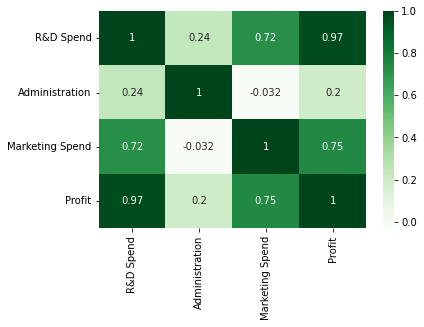

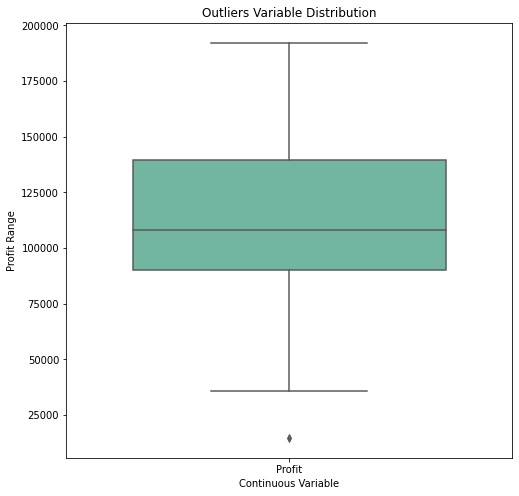

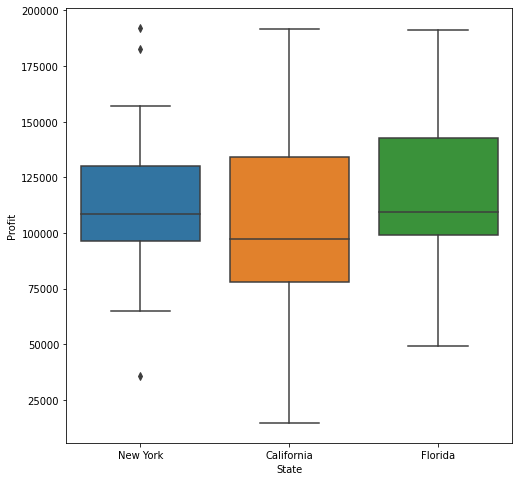

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


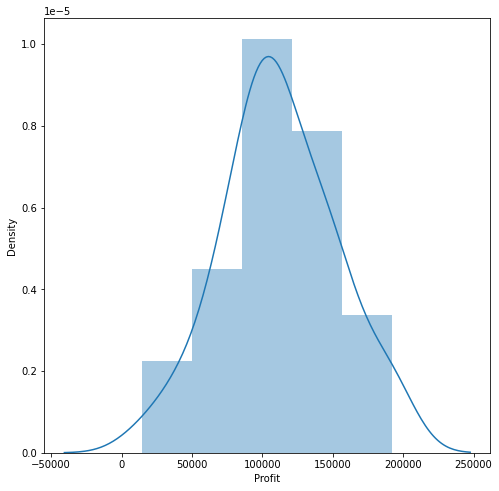

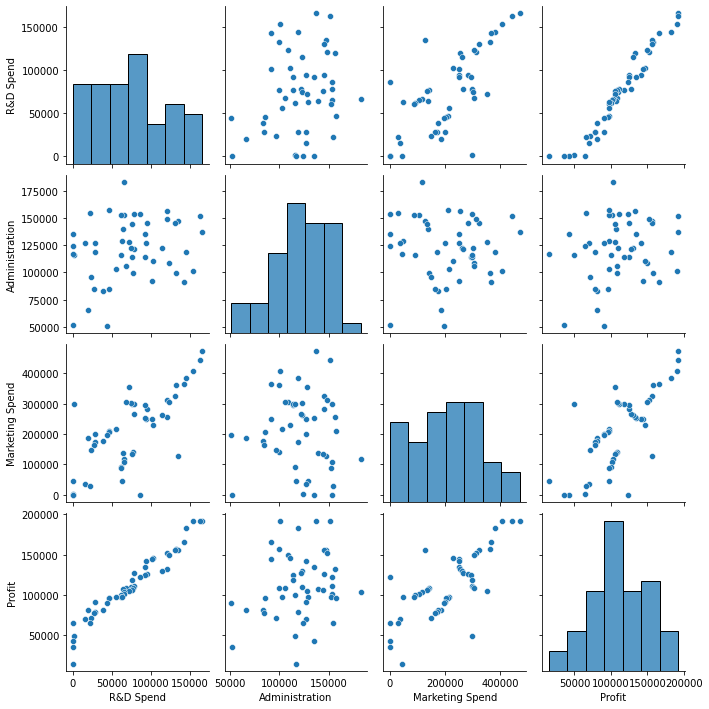

Model Score/Performance on Testing data 0.9324057207634493
Model Score/Performance on Training data 0.9506671824404848
R2 score of model is : 93.21346390789374
Mean Squarred Error is : 6524519362.317416
Root Mean Squarred Error is :  807744.9697966195
Mean Absolute Error is : 6603.238628961082


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv")
df
print(df)
df.head()
df.tail()
df.describe()
df.info()
c = df.corr()
c
sns.heatmap(c,annot=True,cmap='Greens')
plt.show()
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set2" , width=0.7) 
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()
sns.boxplot(x = 'State', y = 'Profit', data = df)
plt.show()
sns.distplot(df['Profit'],bins=5,kde=True)
plt.show()
sns.pairplot(df)
plt.show()
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])
X1 = pd.DataFrame(X)
X1.head()
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)